# IND320 - Assignment 1

Name: Eskil Torp Skogsholm 

GitHub link:

Streamlit app: https://ind320-assignments-esksko-d9kb5eancdgnpkvsbewu86.streamlit.app/


## AI usage

Add content

Add content

Add content

Add content

## Log

Add content

Add content

Add content

Add content

In [485]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [486]:
# Reading weather data and printing the first few rows to see its structure
df = pd.read_csv("../data/open-meteo-subset.csv")

# Converting "time" column to datetime format 
df["time"] = pd.to_datetime(df["time"])

# First 5 rows of the dataset
df.head()

# Print dataset info
print("\nDataset Info:")
print(df.info())

df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB
None


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


In [487]:
# Ensure time is index
df = df.set_index("time")

# Daily mean temperature
daily_mean_temp = df["temperature_2m (°C)"].resample("D").mean().to_frame().reset_index()

# Monthly total precipitation
monthly_precip = df["precipitation (mm)"].resample("M").sum().to_frame().reset_index()

# Daily mean wind speed
monthly_mean_wind = df["wind_speed_10m (m/s)"].resample("M").mean().to_frame().reset_index()

# Monthly average wind gusts
monthly_mean_wind_gusts = df["wind_gusts_10m (m/s)"].resample("M").mean().to_frame().reset_index()




C:\Users\esksk\AppData\Local\Temp\ipykernel_21520\3529617673.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precip = df["precipitation (mm)"].resample("M").sum().to_frame().reset_index()
C:\Users\esksk\AppData\Local\Temp\ipykernel_21520\3529617673.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_wind = df["wind_speed_10m (m/s)"].resample("M").mean().to_frame().reset_index()
C:\Users\esksk\AppData\Local\Temp\ipykernel_21520\3529617673.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_wind_gusts = df["wind_gusts_10m (m/s)"].resample("M").mean().to_frame().reset_index()


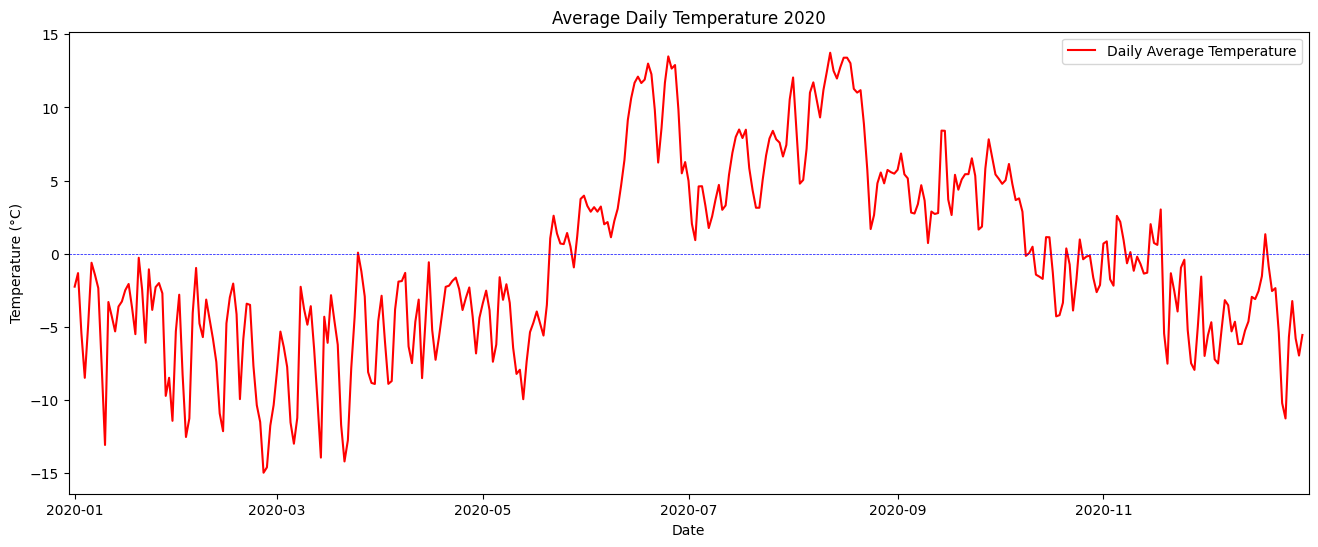

In [488]:
# Plotting temperature_2m (°C)
plt.figure(figsize=(16, 6)) 

#sns.scatterplot(data=daily_mean_df, x="time", y="temperature_2m (°C)", hue="temperature_2m (°C)", palette="flare", legend=None, alpha=1, label="Hourly Temperature", s=8)
sns.lineplot(data=daily_mean_temp, x="time", y="temperature_2m (°C)", color="red", label="Daily Average Temperature")
plt.title("Average Daily Temperature 2020")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.margins(x=0.005)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.5)


C:\Users\esksk\AppData\Local\Temp\ipykernel_21520\371737625.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # remove legend for cleaner look


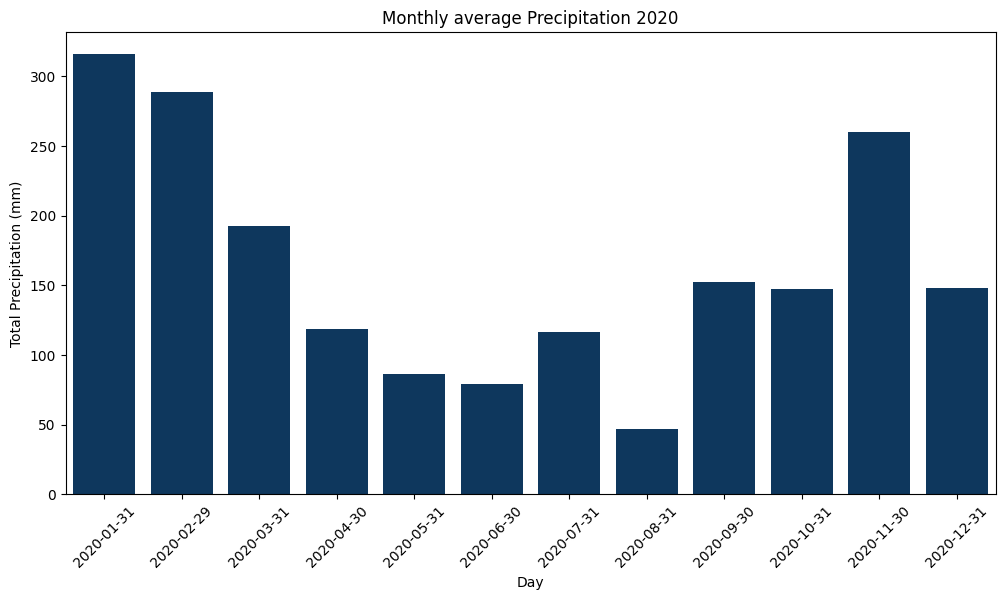

In [489]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_precip,
    x="time",
    y="precipitation (mm)",
    color="#01386a"
)
plt.title("Monthly average Precipitation 2020")
plt.xlabel("Day")
plt.ylabel("Total Precipitation (mm)")
plt.xticks(rotation=45)  # rotate labels for readability
plt.legend().remove()  # remove legend for cleaner look



C:\Users\esksk\AppData\Local\Temp\ipykernel_21520\3143775161.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # remove legend for cleaner look


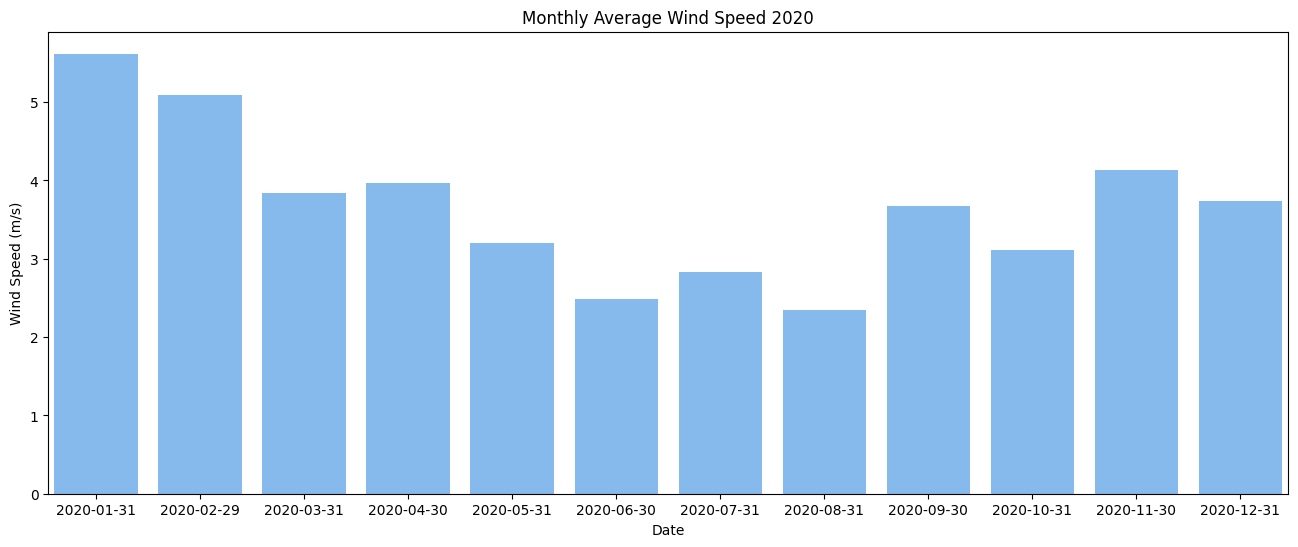

In [490]:
# Plotting wind_speed_10m (m/s)
# Plotting average wind speed for each day
plt.figure(figsize=(16, 6)) 


sns.barplot(data=monthly_mean_wind, x="time", y="wind_speed_10m (m/s)", color="#75bbfd")
plt.title("Monthly Average Wind Speed 2020")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.margins(x=0.005)
plt.legend().remove()  # remove legend for cleaner look


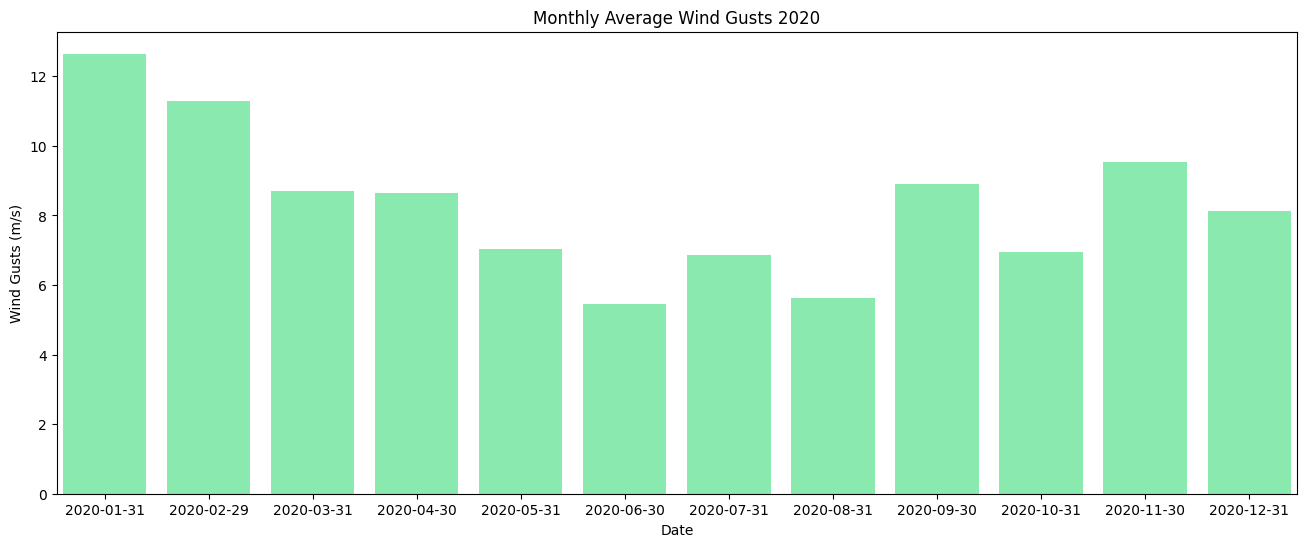

In [491]:
# Plotting wind_gusts_10m (m/s)
plt.figure(figsize=(16, 6))

#sns.lineplot(data=daily_max_wind_gusts, x="time", y="wind_gusts_10m (m/s)", color="orange", label="Hourly Wind Gusts")
sns.barplot(data=monthly_mean_wind_gusts, x="time", y="wind_gusts_10m (m/s)", color="#7af9ab")
plt.title("Monthly Average Wind Gusts 2020")
plt.xlabel("Date")
plt.ylabel("Wind Gusts (m/s)")
plt.margins(x=0.005)


Text(0.5, 0, 'Wind Direction (°)')

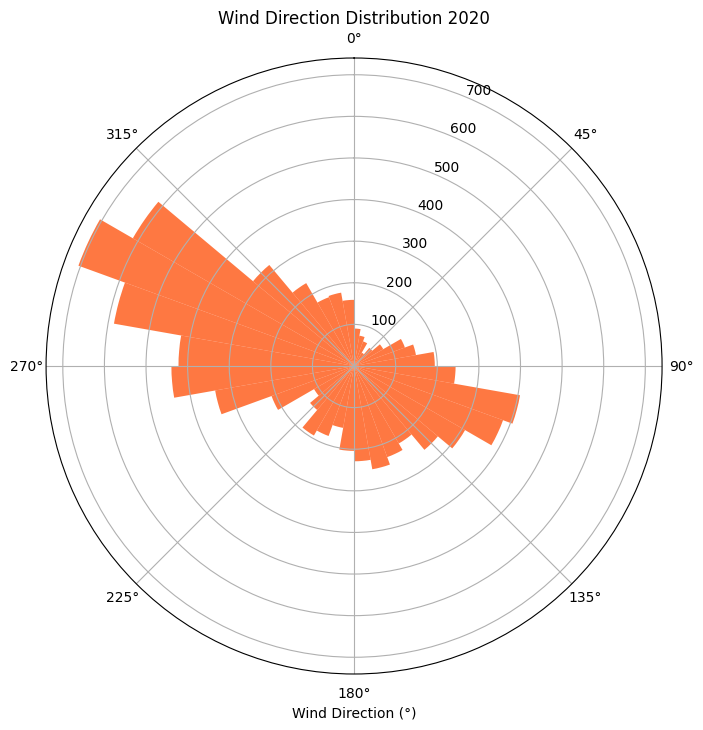

In [492]:
# Plotting wind_direction_10m (°) using a polar plot
# This shows the count of occurrences for each wind direction in degrees over the year

angles = np.deg2rad(df["wind_direction_10m (°)"])


plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(angles, bins=36, color="#fe4b03", alpha=0.75)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Wind Direction Distribution 2020")
ax.set_xlabel("Wind Direction (°)")

c:\Users\esksk\miniconda3\envs\IND320_env\Lib\site-packages\seaborn\_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)
C:\Users\esksk\AppData\Local\Temp\ipykernel_21520\3554435772.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


Text(0.5, 23.999999999999986, 'Wind Direction (°)')

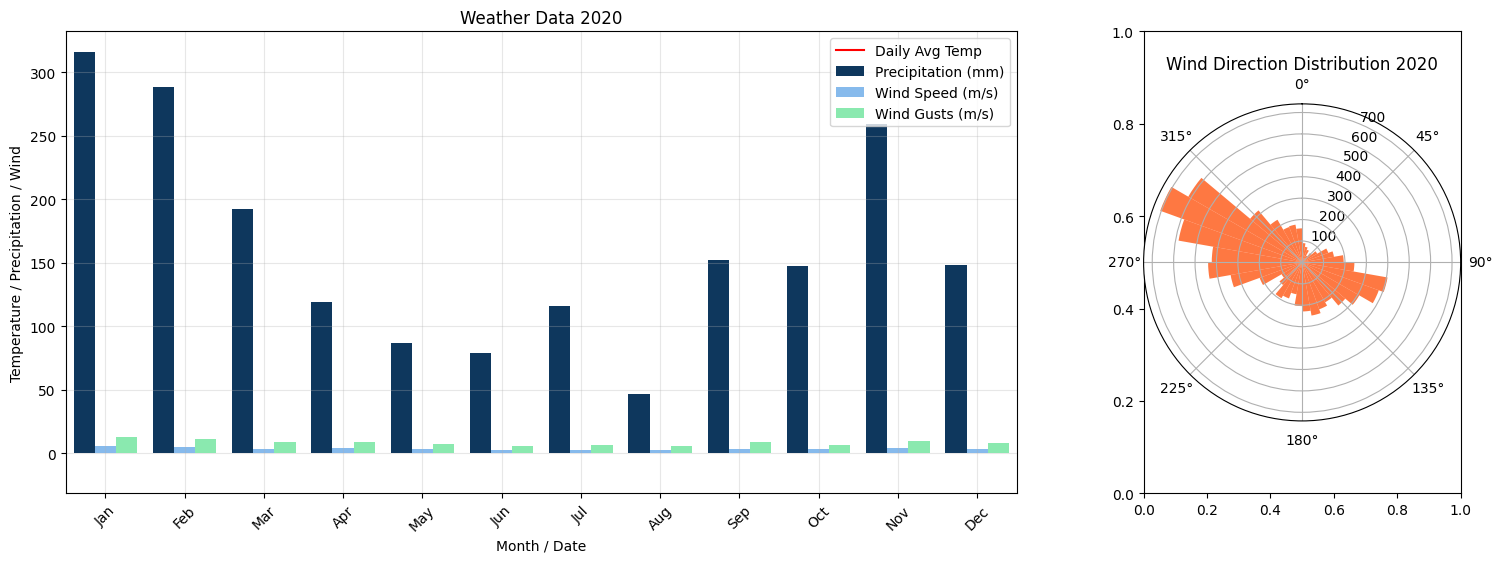

In [493]:
# Left axis: Temperature and grouped bars

monthly_data = pd.DataFrame({
    "month": monthly_precip["time"].dt.strftime("%b"),
    "Precipitation (mm)": monthly_precip["precipitation (mm)"].values,
    "Wind Speed (m/s)": monthly_mean_wind["wind_speed_10m (m/s)"].values,
    "Wind Gusts (m/s)": monthly_mean_wind_gusts["wind_gusts_10m (m/s)"].values
})

monthly_melted = monthly_data.melt(id_vars="month", var_name="Category", value_name="Value")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={"width_ratios": [3, 1]})

# Daily temperature line
sns.lineplot(
    data=daily_mean_temp, 
    x="time", 
    y="temperature_2m (°C)", 
    color="red", 
    label="Daily Avg Temp",
    ax=ax1
)


# Grouped monthly bars
sns.barplot(
    data=monthly_melted,
    x="month",
    y="Value",
    hue="Category",
    hue_order=["Precipitation (mm)", "Wind Speed (m/s)", "Wind Gusts (m/s)"],
    palette=["#01386a", "#75bbfd", "#7af9ab"],
    order=month_order,
    ax=ax1
)

# Formatting
ax1.set_xlabel("Month / Date")
ax1.set_ylabel("Temperature / Precipitation / Wind")
ax1.set_title("Weather Data 2020")
ax1.grid(True, alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(loc="upper right")



# Right axis: Wind direction polar plot
angles = np.deg2rad(df["wind_direction_10m (°)"])
ax2 = plt.subplot(122, polar=True)
ax2.hist(angles, bins=36, color="#fe4b03", alpha=0.75)
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1)
ax2.set_title("Wind Direction Distribution 2020")
ax.set_xlabel("Wind Direction (°)")



